In [2]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [22]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [23]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [25]:
class_names = ['airplane', 'automobile', 'bird', 'cat','deer','dog','frog','horse','ship','truck']

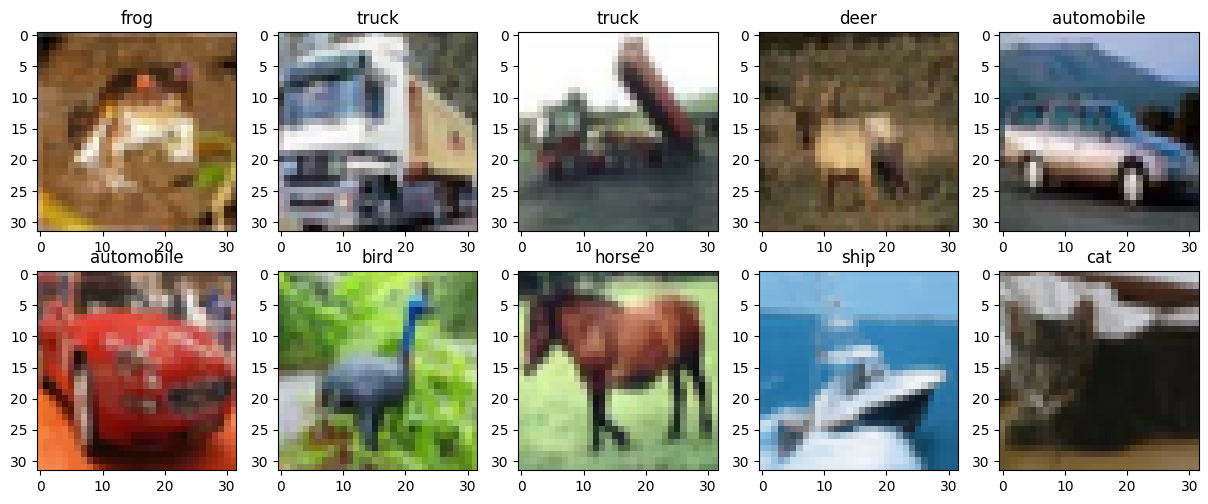

In [26]:
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
plt.show()

#### Prepare data

In [19]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [28]:
x_train = x_train.astype("float")
x_test = x_test.astype("float")

In [29]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


#### Model Building

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Input, Dense, MaxPool2D, Activation,Flatten, Dropout
from tensorflow.keras import regularizers

In [31]:
model = Sequential()
model.add(Conv2D(filters=10, kernel_size = (3,3), strides = (1,1), padding='same', 
                 kernel_regularizer =regularizers.L1L2(l1=1, l2=0))) 
model.add(Activation("relu")) 
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [32]:
model.compile(loss="categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [33]:
model.fit(x=x_train, 
          y=y_train_ohe, 
          batch_size=1000, 
          validation_data=(x_test, y_test_ohe), 
        epochs = 10)

Epoch 1/10
50/50 [==============================] - 7s 134ms/step - loss: 41.9472 - accuracy: 0.1704 - val_loss: 30.7486 - val_accuracy: 0.2122
Epoch 2/10
50/50 [==============================] - 7s 133ms/step - loss: 27.7242 - accuracy: 0.2126 - val_loss: 24.6105 - val_accuracy: 0.2172
Epoch 3/10
50/50 [==============================] - 7s 147ms/step - loss: 22.1434 - accuracy: 0.2315 - val_loss: 19.6400 - val_accuracy: 0.2481
Epoch 4/10
50/50 [==============================] - 7s 144ms/step - loss: 17.6659 - accuracy: 0.2794 - val_loss: 15.7232 - val_accuracy: 0.3074
Epoch 5/10
50/50 [==============================] - 7s 148ms/step - loss: 14.2996 - accuracy: 0.3406 - val_loss: 13.1990 - val_accuracy: 0.3239
Epoch 6/10
50/50 [==============================] - 8s 151ms/step - loss: 12.4192 - accuracy: 0.3393 - val_loss: 11.4714 - val_accuracy: 0.3658
Epoch 7/10
50/50 [==============================] - 7s 136ms/step - loss: 10.6554 - accuracy: 0.3615 - val_loss: 10.1271 - val_accuracy:

1. Tune the above model
2. Incorporate F1 Score in the metrics while training the model